In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Let's run calibration...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from LeCheapEyeTracker import Client, Server

In [3]:
fps = 30
T = 9.

calib = Client(et=Server(), timeline=np.linspace(0, T, T*fps), downscale=2)
calib.app.run()
calib.et.close()

window size :  (2560, 1440)
target dynamic :
 [(0.5, 0.01302790641784668), (0.5, 0.22630786895751953), (0.5, 0.3434469699859619), (0.5, 0.4635279178619385), (0.5, 0.5898878574371338), (0.5, 0.7169368267059326), (0.5, 0.8385319709777832), (0.5, 0.9565129280090332), (0.67, 1.0760807991027832), (0.67, 1.1925427913665771), (0.67, 1.3118767738342285), (0.67, 1.429109811782837), (0.67, 1.5471909046173096), (0.67, 1.665125846862793), (0.67, 1.7844038009643555), (0.67, 1.9017088413238525), (0.33, 2.0192809104919434), (0.33, 2.1371569633483887), (0.33, 2.2521657943725586), (0.33, 2.368701934814453), (0.33, 2.4836628437042236), (0.33, 2.609130859375), (0.33, 2.728200912475586), (0.33, 2.849348783493042), (0.33, 2.966418981552124), (0.67, 3.086862802505493), (0.67, 3.20344877243042), (0.67, 3.3228468894958496), (0.67, 3.4391698837280273), (0.67, 3.5559959411621094), (0.67, 3.6730709075927734), (0.67, 3.791745901107788), (0.67, 3.9107627868652344), (0.5, 4.029482841491699), (0.5, 4.148172855377197

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [4]:
stim_x = np.array([])
eye_x = np.array([])

for stim in calib.stims_X_t:
    x, stash = stim
    stim_x = np.append(stim_x, x)
    
for eye in calib.et.eye_x_t:
    y, stash = eye
    eye_x = np.append(eye_x, y)

print (len(stim_x)==len(eye_x))

True


## ...and plot eye and targets x_positions 

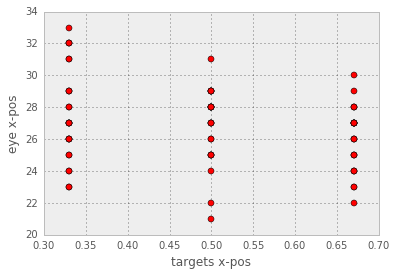

In [5]:
plt.plot(stim_x, eye_x, 'ro')
plt.xlabel('targets x-pos')
plt.ylabel('eye x-pos')
plt.show()

## We must get the mean of eye position for each stimulus position

In [6]:
i = 0
center = np.array([])
left = np.array([])
right = np.array([])

while i <= len(stim_x) - 1 :
    value = stim_x[i]
    if value == 0.33 :
        left = np.append(left, eye_x[i])
    elif value == 0.5 :
        center = np.append(center, eye_x[i])
    else :
        right = np.append(right, eye_x[i])
    i += 1

c_mean = np.mean(center)
l_mean = np.mean(left)
r_mean = np.mean(right)
        

In [7]:
print (l_mean)

27.5769230769


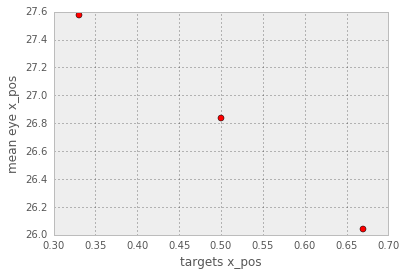

In [8]:
plt.plot([0.33, 0.5, 0.67], [l_mean, c_mean, r_mean], 'ro')
plt.xlabel('targets x_pos')
plt.ylabel('mean eye x_pos')
plt.show()

In [10]:
! git commit -am 'Much better'

[master e14b40f] Much better
 1 file changed, 82 insertions(+), 14 deletions(-)


In [11]:
! git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)
Untracked files:
  (use "git add <file>..." to include in what will be committed)

	../src/my_eye.png

nothing added to commit but untracked files present (use "git add" to track)


In [12]:
! git push

Counting objects: 12, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (11/11), done.
Writing objects: 100% (12/12), 23.87 KiB | 0 bytes/s, done.
Total 12 (delta 8), reused 0 (delta 0)
To https://github.com/meduz/LeCheapEyeTracker
   4d9635e..e14b40f  master -> master
